# Agenda
* Numpy
* Pandas
* Lab


# Introduction


## Create a new notebook for your code-along:

From our submission directory, type:
    
    jupyter notebook

From the IPython Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [ ]:
from numpy import * #Load all the numpy packages

In [ ]:
zeros?

### A Note About "import as" & 'Name spaces'

    import * 
This loads all submodules. Note: this is a waste of memory when incorporated into deployed code. 
We'll use it here by example - it's fine to use for learning purposes and legibility.

As we'll see later, the proper convention is to use:

    import numpy as np
    
And then to specifically call needed methods:

![](http://bit.do/cBuMz)

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [ ]:
# A simple 1-dimensional array:
a = zeros((3))
print(a)
a.shape

In [6]:
b = ones((2,3))
print(b.shape)
print(b)

(2, 3)
[[ 1.  1.  1.]
 [ 1.  1.  1.]]


In [8]:
# Note the way each array is printed:
c = random.randint(1,10,(2,3,4))
print(c.shape)
c

(2, 3, 4)


array([[[8, 4, 2, 5],
        [1, 8, 2, 4],
        [1, 1, 8, 7]],

       [[5, 5, 9, 1],
        [9, 4, 9, 8],
        [2, 9, 5, 9]]])

In [9]:
arange(0, 1, 0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [10]:
demo = arange(24)

In [11]:
demo

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [12]:
demo.shape

(24,)

In [16]:
demo_2d = demo.reshape(-1, 2)
demo_2d

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19],
       [20, 21],
       [22, 23]])

In [17]:
demo_2d.shape

(12, 2)

In [18]:
demo_3d = demo_2d.reshape(-1, 2, 3)
demo_3d.shape


(4, 2, 3)

In [19]:
demo_3d

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

### Arithmetic in arrays is element wise

In [20]:
a = array( [20,30,40,50])
b = arange( 4 )
print a
print b

[20 30 40 50]
[0 1 2 3]


In [21]:
c = a-b
c

array([20, 29, 38, 47])

In [22]:
b**2

array([0, 1, 4, 9])

## Indexing, Slicing and Iterating

In [23]:
# one-dimensional arrays work like lists:
a = arange(10)**2

In [24]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [25]:
a[:8]

array([ 0,  1,  4,  9, 16, 25, 36, 49])

### Multidimensional arrays use (row,column) tuples counting from 0

In [26]:
b = random.randint(1,100,(4,4))

In [27]:
b

array([[19,  3, 63, 56],
       [61, 70, 79, 70],
       [80, 63, 94, 14],
       [29, 59, 55, 50]])

In [28]:
# Guess the output
b[2,3]

14

In [29]:
b[0,0]

19

In [31]:
b[:3, :]

array([[19,  3, 63, 56],
       [61, 70, 79, 70],
       [80, 63, 94, 14]])

In [39]:
b[:,-2:-1].shape

(4, 1)

In [34]:
b[1:3,:]

array([[61, 70, 79, 70],
       [80, 63, 94, 14]])

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [40]:
pd.DataFrame(demo_2d) # note row & column index are auto-generated

,0,1
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
5,10,11
6,12,13
7,14,15
8,16,17
9,18,19


In [41]:
pd.date_range

<function pandas.tseries.index.date_range>

In [42]:
# Creating a DateTime index
dates = pd.date_range('20140101',periods=6)
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [43]:
list('ABCD')

['A', 'B', 'C', 'D']

In [44]:
df = pd.DataFrame(np.random.randn(6,4),
                  index=dates,
                  columns=list('ABCD'))
df

,A,B,C,D
2014-01-01,-0.235157,-0.273721,-1.754758,-0.590853
2014-01-02,1.388139,-0.021583,-0.454461,-0.664451
2014-01-03,-1.278890,2.470258,-1.213402,1.496062
2014-01-04,-0.613528,0.647510,-0.000760,-1.293610
2014-01-05,0.904963,0.632928,-0.288912,2.038495
2014-01-06,-0.349058,-0.717249,-1.365687,1.432492


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2014-01-01 to 2014-01-06
Freq: D
Data columns (total 4 columns):
A    6 non-null float64
B    6 non-null float64
C    6 non-null float64
D    6 non-null float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [46]:
# Index, columns, underlying numpy data
df

,A,B,C,D
2014-01-01,-0.235157,-0.273721,-1.754758,-0.590853
2014-01-02,1.388139,-0.021583,-0.454461,-0.664451
2014-01-03,-1.278890,2.470258,-1.213402,1.496062
2014-01-04,-0.613528,0.647510,-0.000760,-1.293610
2014-01-05,0.904963,0.632928,-0.288912,2.038495
2014-01-06,-0.349058,-0.717249,-1.365687,1.432492


In [47]:
df.transpose()

,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00
A,-0.235157,1.388139,-1.278890,-0.613528,0.904963,-0.349058
B,-0.273721,-0.021583,2.470258,0.647510,0.632928,-0.717249
C,-1.754758,-0.454461,-1.213402,-0.000760,-0.288912,-1.365687
D,-0.590853,-0.664451,1.496062,-1.293610,2.038495,1.432492


In [48]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [49]:
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [50]:
df.values

array([[ -2.35156693e-01,  -2.73721387e-01,  -1.75475799e+00,
         -5.90852828e-01],
       [  1.38813903e+00,  -2.15833768e-02,  -4.54461398e-01,
         -6.64450870e-01],
       [ -1.27888951e+00,   2.47025762e+00,  -1.21340218e+00,
          1.49606246e+00],
       [ -6.13527850e-01,   6.47509939e-01,  -7.59973137e-04,
         -1.29361009e+00],
       [  9.04962598e-01,   6.32928365e-01,  -2.88912364e-01,
          2.03849494e+00],
       [ -3.49058066e-01,  -7.17248815e-01,  -1.36568689e+00,
          1.43249155e+00]])

### Let's create a new example

In [52]:
pd.Series(1,index=list(range(4)),dtype='float32')

0    1.0
1    1.0
2    1.0
3    1.0
dtype: float32

In [51]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
      'D' : np.array([3] * 4,dtype='int32'),
      'E' : 'foo' })


df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [53]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

#### Viewing Data

In [54]:
df.head(1)

,A,B,C,D
2014-01-01,-0.235157,-0.273721,-1.754758,-0.590853


In [55]:
df.tail(2)

,A,B,C,D
2014-01-05,0.904963,0.632928,-0.288912,2.038495
2014-01-06,-0.349058,-0.717249,-1.365687,1.432492


In [56]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [57]:
df.columns # Note: columns are also of type 'Index'!

Index([u'A', u'B', u'C', u'D'], dtype='object')

#### Quick summary statistics

In [59]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.030588,0.456357,-0.846330,0.403023
std,0.992914,1.119134,0.694115,1.409621
min,-1.278890,-0.717249,-1.754758,-1.293610
25%,-0.547410,-0.210687,-1.327616,-0.646051
50%,-0.292107,0.305672,-0.833932,0.420819
75%,0.619933,0.643865,-0.330300,1.480170
max,1.388139,2.470258,-0.000760,2.038495


In [58]:
percentiles = np.arange(0, 1, 0.1)
df.describe(percentiles=list(percentiles))

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.030588,0.456357,-0.846330,0.403023
std,0.992914,1.119134,0.694115,1.409621
min,-1.278890,-0.717249,-1.754758,-1.293610
0%,-1.278890,-0.717249,-1.754758,-1.293610
10%,-0.946209,-0.495485,-1.560222,-0.979030
20%,-0.613528,-0.273721,-1.365687,-0.664451
30.0%,-0.481293,-0.147652,-1.289545,-0.627652
40%,-0.349058,-0.021583,-1.213402,-0.590853
50%,-0.292107,0.305672,-0.833932,0.420819


In [60]:
df.sort_values(by=['B', 'D'], ascending=False)

,A,B,C,D
2014-01-03,-1.278890,2.470258,-1.213402,1.496062
2014-01-04,-0.613528,0.647510,-0.000760,-1.293610
2014-01-05,0.904963,0.632928,-0.288912,2.038495
2014-01-02,1.388139,-0.021583,-0.454461,-0.664451
2014-01-01,-0.235157,-0.273721,-1.754758,-0.590853
2014-01-06,-0.349058,-0.717249,-1.365687,1.432492


### Selection

In [61]:
type(df['A'])

pandas.core.series.Series

In [62]:
df['A'].shape

(6,)

In [63]:
type(df[['A']]) # Careful! Get different type depending on selection

pandas.core.frame.DataFrame

In [64]:
df[['A']].shape

(6, 1)

In [65]:
df[0:3]

,A,B,C,D
2014-01-01,-0.235157,-0.273721,-1.754758,-0.590853
2014-01-02,1.388139,-0.021583,-0.454461,-0.664451
2014-01-03,-1.278890,2.470258,-1.213402,1.496062


In [66]:
# By label
dates[2]

Timestamp('2014-01-03 00:00:00', freq='D')

In [67]:
df.loc[dates[2], 'B'] # Select the first row, get back a pd.Series

2.4702576196578963

In [ ]:
df.loc['2014-01-01', 'B']

In [ ]:
df.iloc[0, 1]

In [68]:
# multi-axis by label
df.loc[:,['A','D']]

,A,D
2014-01-01,-0.235157,-0.590853
2014-01-02,1.388139,-0.664451
2014-01-03,-1.278890,1.496062
2014-01-04,-0.613528,-1.293610
2014-01-05,0.904963,2.038495
2014-01-06,-0.349058,1.432492


In [69]:
# Date Range
df.loc['20140102':'20140104',['B', 'D']]

,B,D
2014-01-02,-0.021583,-0.664451
2014-01-03,2.470258,1.496062
2014-01-04,0.647510,-1.293610


In [70]:
# Fast access to scalar
df.at[dates[1],'B']

-0.021583376764592085

In [71]:
# iloc provides integer locations similar to np style
df.iloc[3:]

,A,B,C,D
2014-01-04,-0.613528,0.647510,-0.000760,-1.293610
2014-01-05,0.904963,0.632928,-0.288912,2.038495
2014-01-06,-0.349058,-0.717249,-1.365687,1.432492


### Boolean Indexing

In [73]:
df[(df.A > 0) | (df.B<0)] # Basically a 'where' operation

,A,B,C,D
2014-01-01,-0.235157,-0.273721,-1.754758,-0.590853
2014-01-02,1.388139,-0.021583,-0.454461,-0.664451
2014-01-05,0.904963,0.632928,-0.288912,2.038495
2014-01-06,-0.349058,-0.717249,-1.365687,1.432492


### Setting

In [74]:
df_posA = df.copy() # Without "copy" it would act on the dataset
df_posA[df_posA.A < 0] = 4 # Converting negative values in 'A' to positive

In [75]:
df_posA

,A,B,C,D
2014-01-01,4.000000,4.000000,4.000000,4.000000
2014-01-02,1.388139,-0.021583,-0.454461,-0.664451
2014-01-03,4.000000,4.000000,4.000000,4.000000
2014-01-04,4.000000,4.000000,4.000000,4.000000
2014-01-05,0.904963,0.632928,-0.288912,2.038495
2014-01-06,4.000000,4.000000,4.000000,4.000000


In [76]:
#Setting new column  - auto aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [77]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [78]:
df['F'] = s1

In [79]:
df # Note missing value in first row for column 'F'!

,A,B,C,D,F
2014-01-01,-0.235157,-0.273721,-1.754758,-0.590853,NaN
2014-01-02,1.388139,-0.021583,-0.454461,-0.664451,1.0
2014-01-03,-1.278890,2.470258,-1.213402,1.496062,2.0
2014-01-04,-0.613528,0.647510,-0.000760,-1.293610,3.0
2014-01-05,0.904963,0.632928,-0.288912,2.038495,4.0
2014-01-06,-0.349058,-0.717249,-1.365687,1.432492,5.0


### Missing Data

In [80]:
# Add a column with missing data (on subset of df, just rows [0:4])
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [81]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [82]:
df1

,A,B,C,D,F,E
2014-01-01,-0.235157,-0.273721,-1.754758,-0.590853,NaN,1.0
2014-01-02,1.388139,-0.021583,-0.454461,-0.664451,1.0,1.0
2014-01-03,-1.278890,2.470258,-1.213402,1.496062,2.0,NaN
2014-01-04,-0.613528,0.647510,-0.000760,-1.293610,3.0,NaN


In [85]:
# find where values are null
pd.isnull(df1)

,A,B,C,D,F,E
2014-01-01,False,False,False,False,True,False
2014-01-02,False,False,False,False,False,False
2014-01-03,False,False,False,False,False,True
2014-01-04,False,False,False,False,False,True


### Operations

In [ ]:
df.describe()

In [88]:
df.mean() 

A   -0.030588
B    0.456357
C   -0.846330
D    0.403023
F    3.000000
dtype: float64

In [87]:
df.mean(axis=1) # Operation on two different axes

2014-01-01   -0.713622
2014-01-02    0.249529
2014-01-03    0.694806
2014-01-04    0.347922
2014-01-05    1.457495
2014-01-06    0.800100
Freq: D, dtype: float64

### Applying functions

In [89]:
df

,A,B,C,D,F
2014-01-01,-0.235157,-0.273721,-1.754758,-0.590853,NaN
2014-01-02,1.388139,-0.021583,-0.454461,-0.664451,1.0
2014-01-03,-1.278890,2.470258,-1.213402,1.496062,2.0
2014-01-04,-0.613528,0.647510,-0.000760,-1.293610,3.0
2014-01-05,0.904963,0.632928,-0.288912,2.038495,4.0
2014-01-06,-0.349058,-0.717249,-1.365687,1.432492,5.0


In [90]:
df.apply(np.cumsum)

,A,B,C,D,F
2014-01-01,-0.235157,-0.273721,-1.754758,-0.590853,NaN
2014-01-02,1.152982,-0.295305,-2.209219,-1.255304,1.0
2014-01-03,-0.125907,2.174953,-3.422622,0.240759,3.0
2014-01-04,-0.739435,2.822463,-3.423382,-1.052851,6.0
2014-01-05,0.165528,3.455391,-3.712294,0.985644,10.0
2014-01-06,-0.183530,2.738142,-5.077981,2.418135,15.0


In [94]:
df.apply(lambda x: x.max() - x.min(), axis=1)

2014-01-01    1.519601
2014-01-02    2.052590
2014-01-03    3.749147
2014-01-04    4.293610
2014-01-05    4.288912
2014-01-06    6.365687
Freq: D, dtype: float64

In [95]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [96]:
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [97]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [98]:
random.randn(10,4)

array([[  5.52773491e-01,   8.02876135e-01,   1.05316161e+00,
          4.63617957e-01],
       [  6.53965914e-01,   1.50769986e+00,   9.29569397e-02,
         -2.33160438e-01],
       [  1.61043397e+00,  -6.36022133e-01,   1.56929082e+00,
         -9.88517404e-04],
       [ -1.83119434e-01,  -1.92970776e-03,   6.31391511e-01,
          2.17231368e+00],
       [ -3.39087684e-01,  -1.16066830e+00,  -1.19427900e+00,
          9.82526149e-01],
       [  1.57301595e+00,  -2.41164196e-01,   1.58069528e+00,
         -2.10643669e+00],
       [ -2.23160900e+00,   2.02519265e+00,   5.48341825e-01,
         -1.02799006e+00],
       [ -6.45134485e-01,  -1.93910627e+00,   8.78122631e-01,
          7.91340731e-01],
       [  1.86578629e-01,   3.14828149e-01,   1.27433843e+00,
         -5.78051575e-01],
       [  2.08285685e+00,   1.57112807e-01,   1.00992835e+00,
         -5.17983009e-01]])

In [99]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.696552,-0.358490,1.534344,0.320297
1,0.896990,-0.506423,0.606701,0.502408
2,0.641432,1.373179,0.461393,0.865785
3,0.920046,0.199611,-0.956075,-1.086844
4,1.279496,1.482070,0.647698,0.733999
5,-0.452230,-1.784671,-0.545294,0.733558
6,-2.328537,-0.893608,-1.107131,0.598173
7,0.668898,-0.754588,0.279424,0.333207
8,1.360662,-1.848269,0.389081,-0.017358
9,0.331506,0.086982,-0.326056,0.108515


In [100]:
# Break it into pieces
piece_1 = df[:3]
piece_2 = df[3:7]
piece_3 = df[7:]
print(piece_1)
print(piece_2)
print(piece_3)

          0         1         2         3
0  0.696552 -0.358490  1.534344  0.320297
1  0.896990 -0.506423  0.606701  0.502408
2  0.641432  1.373179  0.461393  0.865785
          0         1         2         3
3  0.920046  0.199611 -0.956075 -1.086844
4  1.279496  1.482070  0.647698  0.733999
5 -0.452230 -1.784671 -0.545294  0.733558
6 -2.328537 -0.893608 -1.107131  0.598173
          0         1         2         3
7  0.668898 -0.754588  0.279424  0.333207
8  1.360662 -1.848269  0.389081 -0.017358
9  0.331506  0.086982 -0.326056  0.108515


In [102]:
pd.concat([piece_1, piece_2, piece_3])

,0,1,2,3
0,0.696552,-0.358490,1.534344,0.320297
1,0.896990,-0.506423,0.606701,0.502408
2,0.641432,1.373179,0.461393,0.865785
3,0.920046,0.199611,-0.956075,-1.086844
4,1.279496,1.482070,0.647698,0.733999
5,-0.452230,-1.784671,-0.545294,0.733558
6,-2.328537,-0.893608,-1.107131,0.598173
7,0.668898,-0.754588,0.279424,0.333207
8,1.360662,-1.848269,0.389081,-0.017358
9,0.331506,0.086982,-0.326056,0.108515


In [103]:
# Also can "Join" and "Append"
piece_1.append(piece_2)

,0,1,2,3
0,0.696552,-0.358490,1.534344,0.320297
1,0.896990,-0.506423,0.606701,0.502408
2,0.641432,1.373179,0.461393,0.865785
3,0.920046,0.199611,-0.956075,-1.086844
4,1.279496,1.482070,0.647698,0.733999
5,-0.452230,-1.784671,-0.545294,0.733558
6,-2.328537,-0.893608,-1.107131,0.598173


In [104]:
piece_1.T.join(piece_2.T)

,0,1,2,3,4,5,6
0,0.696552,0.896990,0.641432,0.920046,1.279496,-0.452230,-2.328537
1,-0.358490,-0.506423,1.373179,0.199611,1.482070,-1.784671,-0.893608
2,1.534344,0.606701,0.461393,-0.956075,0.647698,-0.545294,-1.107131
3,0.320297,0.502408,0.865785,-1.086844,0.733999,0.733558,0.598173


### Grouping


In [105]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [107]:
df

,A,B,C,D
0,foo,one,1.090863,-0.319507
1,bar,one,0.904231,0.375473
2,foo,two,1.985105,-1.050481
3,bar,three,-0.857452,-0.774162
4,foo,two,-0.492294,0.065294
5,bar,two,-0.885722,-0.551595
6,foo,one,1.158061,0.911745
7,foo,three,1.611283,0.937037


In [106]:
grouped_sum = df.groupby(['A','B']).sum()
grouped_sum

C         D
A   B                        
bar one    0.904231  0.375473
    three -0.857452 -0.774162
    two   -0.885722 -0.551595
foo one    2.248924  0.592238
    three  1.611283  0.937037
    two    1.492811 -0.985186

### Reshaping

In [ ]:
# You can also stack or unstack levels

In [110]:
unstacked = grouped_sum.unstack('B')
unstacked

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar  0.904231 -0.857452 -0.885722  0.375473 -0.774162 -0.551595
foo  2.248924  1.611283  1.492811  0.592238  0.937037 -0.985186

In [111]:
# Pivot Tables
pd.pivot_table(df,values=['C','D'],index=['A'],columns=['B'])

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar  0.904231 -0.857452 -0.885722  0.375473 -0.774162 -0.551595
foo  1.124462  1.611283  0.746406  0.296119  0.937037 -0.492593

### Time Series


In [ ]:
import pandas as pd
import numpy as np

In [112]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [113]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [114]:
ts


2014-01-01 00:00:00    276
2014-01-01 00:00:01    165
2014-01-01 00:00:02    201
2014-01-01 00:00:03    184
2014-01-01 00:00:04     28
2014-01-01 00:00:05    480
2014-01-01 00:00:06     94
2014-01-01 00:00:07    251
2014-01-01 00:00:08    392
2014-01-01 00:00:09    424
2014-01-01 00:00:10     67
2014-01-01 00:00:11     29
2014-01-01 00:00:12     47
2014-01-01 00:00:13    332
2014-01-01 00:00:14     49
2014-01-01 00:00:15    488
2014-01-01 00:00:16    420
2014-01-01 00:00:17    134
2014-01-01 00:00:18    275
2014-01-01 00:00:19    228
2014-01-01 00:00:20     40
2014-01-01 00:00:21    442
2014-01-01 00:00:22    102
2014-01-01 00:00:23    384
2014-01-01 00:00:24    131
2014-01-01 00:00:25    286
2014-01-01 00:00:26    376
2014-01-01 00:00:27    160
2014-01-01 00:00:28    245
2014-01-01 00:00:29    434
                      ... 
2014-01-01 00:01:10    145
2014-01-01 00:01:11    235
2014-01-01 00:01:12    307
2014-01-01 00:01:13    138
2014-01-01 00:01:14    301
2014-01-01 00:01:15    401
2

In [116]:
# Built in resampling
ts.resample('Min').mean() # Resample secondly to 1Minutely

2014-01-01 00:00:00    230.933333
2014-01-01 00:01:00    243.850000
Freq: T, dtype: float64

In [ ]:
# Many additional time series features
ts.

### Plotting


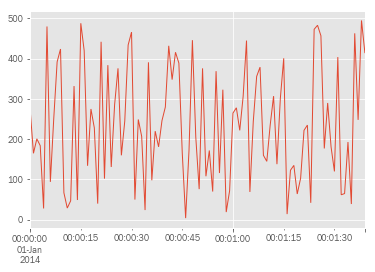

In [117]:
ts.plot(); # Note semicolon for 'cleaner' output

In [118]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), 
                   index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

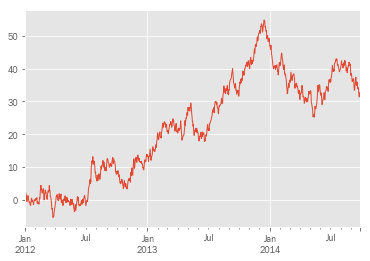

In [119]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [ ]:
# Pandas plot function will print with labels as default

In [ ]:
df = pd.DataFrame(np.random.randn(100, 4), 
                  index=ts.index,columns=['A', 'B', 'C', 'D'])
df.cumsum().plot();

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas